In [21]:
import pandas as pd
import numpy as np
# read csv file
df = pd.read_csv("bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [23]:
def replace_marital(val):
    if val == "single":
        return 0
    else:
        return 1


df["marital"] = df["marital"].apply(replace_marital, 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
df["housing"] = df["housing"].map({"no": 0, "yes": 1}.get)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [25]:
df["loan"] = df["loan"].replace({"no": 0, "yes": 1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [26]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [27]:
df["job"].replace(
    {
        "unknown": np.nan,
        "unemployed": 0,
        "services": 1,
        "management": 2,
        "blue-collar": 3,
        "self-employed": 4,
        "technician": 5,
        "entrepreneur": 6,
        "admin.": 7,
        "student": 8,
        "housemaid": 9,
        "retired": 10,
    },
    inplace=True,
)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [28]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [29]:
df["education"].replace(
    {"primary": 0, "secondary": 1, "tertiary": 2, "unknown": np.nan}, inplace=True
)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [30]:
df["default"].replace({"no": 0, "yes": 1}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [31]:
df["balance"].min()

-3313

In [32]:
df["balance"].max()

71188

In [33]:
df["balance"] = df["balance"].apply(lambda x: (x - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [34]:
df.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [35]:
df.contact.replace({"unknown": np.nan, "cellular": 0, "telephone": 1}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [36]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [37]:
df.month = df.month.map(
    {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12,
    }
)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [38]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [39]:
df.poutcome = df.poutcome.map(
    {"unknown": np.nan, "other": 0, "failure": 1, "success": 2}
)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,-1,0,NaN,no
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,220,1,339,4,1.0,no
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,185,1,330,1,1.0,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [40]:
df.pdays = df.pdays.apply(lambda x: (x - df.pdays.min()) / (df.pdays.max() - df.pdays.min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,0.000000,0,NaN,no
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,220,1,0.389908,4,1.0,no
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,185,1,0.379587,1,1.0,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [41]:
df.y.replace({"no": 0, "yes": 1}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,220,1,0.389908,4,1.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,185,1,0.379587,1,1.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [42]:
df.duration = df.duration.apply(lambda x: (x - df.duration.min()) / (df.duration.max() - df.duration.min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,0.071500,1,0.389908,4,1.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,0.059914,1,0.379587,1,1.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [43]:
df.age = df.age.apply(lambda x: (x - df.age.min()) / (df.age.max() - df.age.min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.161765,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,0.205882,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,0.071500,1,0.389908,4,1.0,0
2,0.235294,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,0.059914,1,0.379587,1,1.0,0
3,0.161765,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,0.588235,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [44]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,0.326031,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.094151,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.916667,0.115240
std,0.155533,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.626935,0.319347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,0.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.294118,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,0.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,1.000000,0.000000
75%,0.441176,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,0.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [47]:
df.to_csv("bank_preprocessed.csv", index=False)
new_df = pd.read_csv("bank_preprocessed.csv")
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.161765,0.0,1,0.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,0.205882,1.0,1,1.0,0,0.108750,1,1,0.0,11,5,0.071500,1,0.389908,4,1.0,0
2,0.235294,2.0,0,2.0,0,0.062590,1,0,0.0,16,4,0.059914,1,0.379587,1,1.0,0
3,0.161765,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,0.588235,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [48]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.246948,0.410768,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.114406,0.045092
job,0.246948,1.000000,0.022194,-0.159257,0.000797,0.046488,-0.140553,0.009586,0.084848,0.000524,0.026193,-0.009160,-0.041718,0.001408,0.022125,0.094931,0.066550
marital,0.410768,0.022194,1.000000,-0.169967,-0.007391,-0.007525,0.041449,0.048496,0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,0.021848,-0.045815
education,-0.190484,-0.159257,-0.169967,1.000000,-0.011623,0.056585,-0.072716,-0.024752,-0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.003486,0.055368
default,-0.017885,0.000797,-0.007391,-0.011623,1.000000,-0.070886,0.006881,0.063994,-0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,-0.089812,0.001303
balance,0.083820,0.046488,-0.007525,0.056585,-0.070886,1.000000,-0.050227,-0.071349,0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.053599,0.017905
housing,-0.193888,-0.140553,0.041449,-0.072716,0.006881,-0.050227,1.000000,0.018451,-0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.202828,-0.104683
loan,-0.011250,0.009586,0.048496,-0.024752,0.063994,-0.071349,0.018451,1.000000,-0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.058408,-0.070517
contact,0.204200,0.084848,0.056938,-0.117748,-0.023372,0.036326,-0.046484,-0.007166,1.000000,0.055509,-0.014321,-0.027292,0.033973,-0.024204,-0.001642,-0.014590,0.002108
day,-0.017853,0.000524,-0.006769,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,-0.025287,-0.011244


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

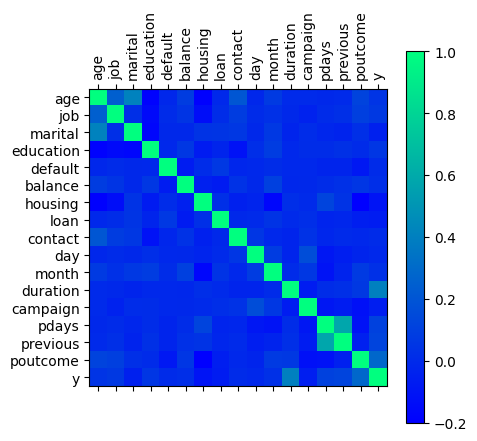

In [53]:
plt.matshow(new_df.corr(), cmap="winter")
plt.colorbar()
plt.xticks(np.arange(len(new_df.columns)), new_df.columns, rotation=90)
plt.yticks(np.arange(len(new_df.columns)), new_df.columns)
plt.show()

In [54]:
new_df.corr()["y"].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.282380
previous     0.116714
pdays        0.104087
job          0.066550
education    0.055368
age          0.045092
month        0.023335
balance      0.017905
contact      0.002108
default      0.001303
day         -0.011244
marital     -0.045815
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

<Axes: >

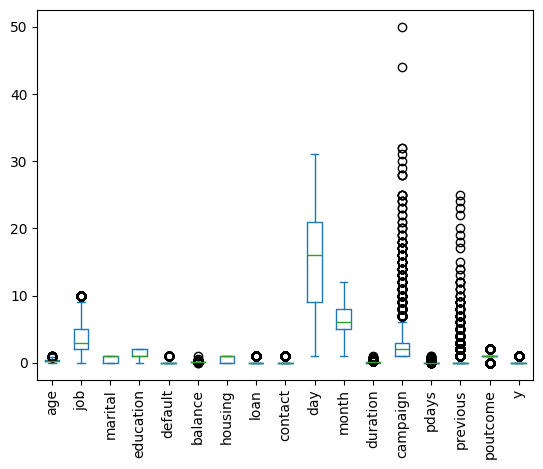

In [61]:
new_df.plot.box(rot=90)

<Axes: >

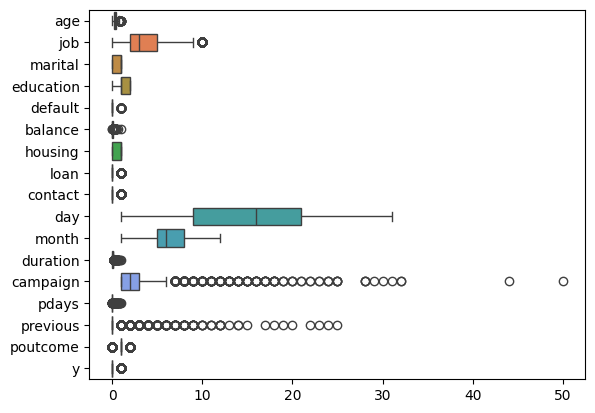

In [62]:
sns.boxplot(data = df, orient = "h")

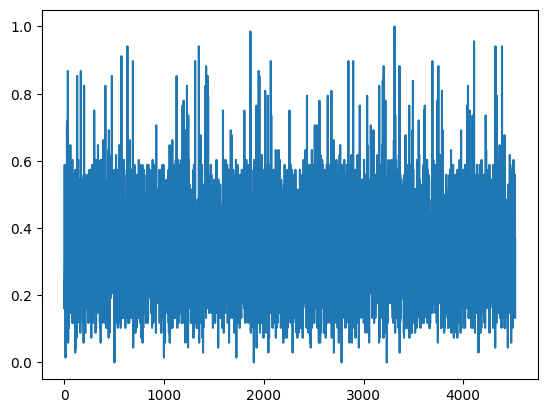

In [65]:
plt.plot(new_df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

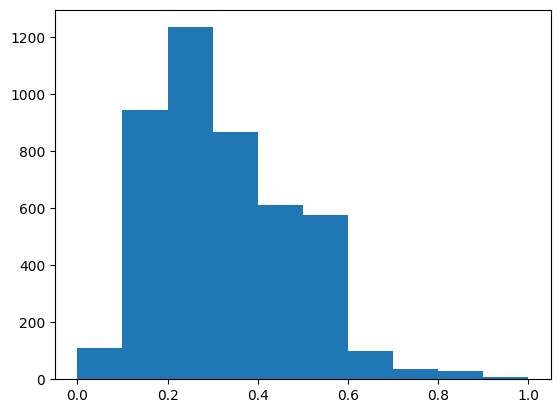

In [67]:
plt.hist(new_df.age.values)

<Axes: ylabel='Density'>

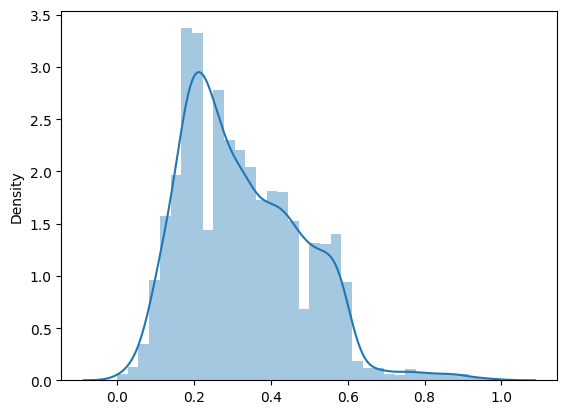

In [68]:
sns.distplot(new_df.age.values)

<Axes: ylabel='Count'>

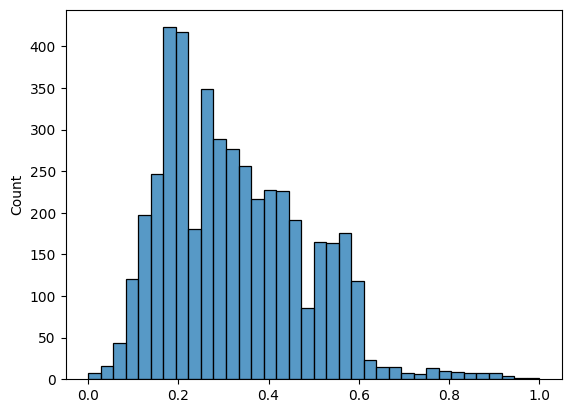

In [69]:
sns.histplot(new_df.age.values)

<Axes: >

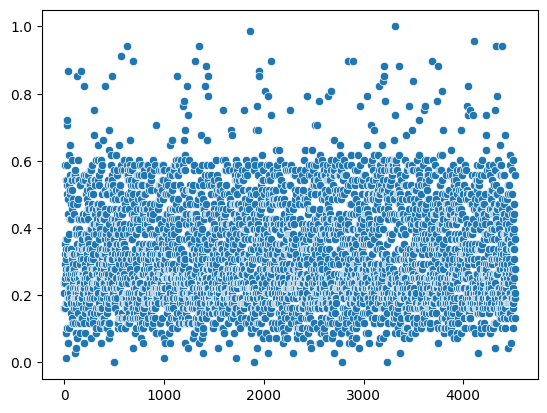

In [73]:
sns.scatterplot(data=new_df.age.values)